In [1]:
# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

In [2]:
authors = pd.read_csv("./nips-papers/authors.csv")
paper_authors = pd.read_csv("./nips-papers/paper_authors.csv")
papers = pd.read_csv("./nips-papers/papers.csv")

In [3]:
papers.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...

In [4]:
paper_authors.head()

id  paper_id  author_id
0   1        63         94
1   2        80        124
2   3        80        125
3   4        80        126
4   5        80        127

In [5]:
authors.head(5)

id                  name
0      1        Hisashi Suzuki
1     10           David Brady
2    100  Santosh S. Venkatesh
3   1000     Charles Fefferman
4  10000         Artur Speiser

In [6]:
df_all = pd.merge(papers, paper_authors, left_on='id', right_on='paper_id', suffixes=('_paper',''))
df_all.drop(columns=['id_paper', 'id'], inplace=True)
df_all.head(1)

year                                              title event_type  \
0  1987  Self-Organization of Associative Database and ...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   

                                          paper_text  paper_id  author_id  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...         1          1

In [7]:
df_all = pd.merge(df_all, authors, left_on='author_id', right_on='id')
df_all.drop(columns=['id'], inplace=True)
df_all.head(1)

year                                              title event_type  \
0  1987  Self-Organization of Associative Database and ...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   

                                          paper_text  paper_id  author_id  \
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...         1          1   

             name  
0  Hisashi Suzuki

# Coauthorship network (2nd method)

In [8]:
df_all.head(3)
# df_all = df_all[df_all.year>2016].copy()

year                                              title event_type  \
0  1987  Self-Organization of Associative Database and ...        NaN   
1  1987  Self-Organization of Associative Database and ...        NaN   
2  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  1-self-organization-of-associative-database-an...  Abstract Missing   
2  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   

                                          paper_text  paper_id  author_id  \
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...         1          1   
1  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...         1          2   
2  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...        10         14   

                      name  
0           Hisashi Suzuki  
1           Suguru Arimoto  
2  Christopher L. Scofield

In [9]:
self_merge = pd.merge(df_all, df_all, on='paper_id', suffixes=('_left', '_right'))
self_merge = self_merge[self_merge.name_left != self_merge.name_right]
self_merge.head(1)

year_left                                         title_left  \
1       1987  Self-Organization of Associative Database and ...   

  event_type_left                                      pdf_name_left  \
1             NaN  1-self-organization-of-associative-database-an...   

      abstract_left                                    paper_text_left  \
1  Abstract Missing  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   

   paper_id  author_id_left       name_left  year_right  \
1         1               1  Hisashi Suzuki        1987   

                                         title_right event_type_right  \
1  Self-Organization of Associative Database and ...              NaN   

                                      pdf_name_right    abstract_right  \
1  1-self-organization-of-associative-database-an...  Abstract Missing   

                                    paper_text_right  author_id_right  \
1  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...                2   

       name_right  
1  Suguru Arimoto

In [10]:
nodes = df_all[~df_all.name.duplicated()].reset_index(drop=True).reset_index()
nodes.head(1)

index  year                                              title event_type  \
0      0  1987  Self-Organization of Associative Database and ...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   

                                          paper_text  paper_id  author_id  \
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...         1          1   

             name  
0  Hisashi Suzuki

In [11]:
name_index = nodes.name.to_dict()
name_index = {v: k for k, v in name_index.items()}
# {'Hisashi Suzuki': 0,
#  'Suguru Arimoto': 1,
#  'Christopher L. Scofield': 2,
#  'Patric K. Stanton': 3,
#  'Terrence J. Sejnowski': 4,
#  'Gerhard Paass': 5,
#  'Jörg Kindermann': 6,

In [12]:
self_merge['source'] = self_merge.name_left.map(name_index)
self_merge['target'] = self_merge.name_right.map(name_index)
self_merge.head(1)

year_left                                         title_left  \
1       1987  Self-Organization of Associative Database and ...   

  event_type_left                                      pdf_name_left  \
1             NaN  1-self-organization-of-associative-database-an...   

      abstract_left                                    paper_text_left  \
1  Abstract Missing  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...   

   paper_id  author_id_left       name_left  year_right  \
1         1               1  Hisashi Suzuki        1987   

                                         title_right event_type_right  \
1  Self-Organization of Associative Database and ...              NaN   

                                      pdf_name_right    abstract_right  \
1  1-self-organization-of-associative-database-an...  Abstract Missing   

                                    paper_text_right  author_id_right  \
1  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...                2   

       name_right  source  target  
1  Suguru Arimoto       0       1

In [13]:
import numpy as np
def get_adjacency(nodes, edges):
    n_nodes = len(nodes)
    adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

    for idx, row in edges.iterrows():
        i, j = int(row.source), int(row.target)
        adjacency[i, j] += 1

    return adjacency

adjacency = get_adjacency(nodes, self_merge)
graph = nx.from_numpy_array(adjacency)

In [14]:
edge_dict = {}
keyword_dict = {}
for i, row in self_merge.iterrows():
    edge_dict[(row['source'], row['target'])] =  row['year_left']
    keyword_dict[(row['source'], row['target'])] =  row['event_type_left']

In [15]:
nx.set_edge_attributes(graph, edge_dict, name='year')
nx.set_edge_attributes(graph, keyword_dict, name='event_type')
mapping = nodes.name.to_dict()
# {0: 'Hisashi Suzuki',
#  1: 'Suguru Arimoto',
#  2: 'Christopher L. Scofield',
#  3: 'Patric K. Stanton',
#  4: 'Terrence J. Sejnowski',
#  5: 'Gerhard Paass',
#  6: 'Jörg Kindermann',

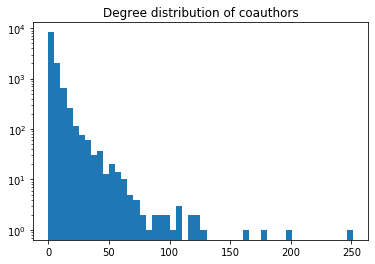

In [16]:
plt.title('Degree distribution of coauthors')
plt.hist(adjacency.sum(axis=1), bins=50, log=True)
plt.show()

Component sizes:

In [17]:
pd.Series([len(i) for i in list(nx.connected_components(graph))]).value_counts().sort_index()

1       211
2       291
3       192
4        95
5        44
6        26
7        24
8         7
9         5
10        2
11        4
12        4
13        2
14        2
16        1
17        1
18        1
20        1
21        1
8978      1
dtype: int64

This is a simple drawing of our network: we see that there is a large core communit, and many many smaller comminitues of co authors. We will look more into the main community

/Users/kangpl/anaconda3/envs/ntds_2019/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


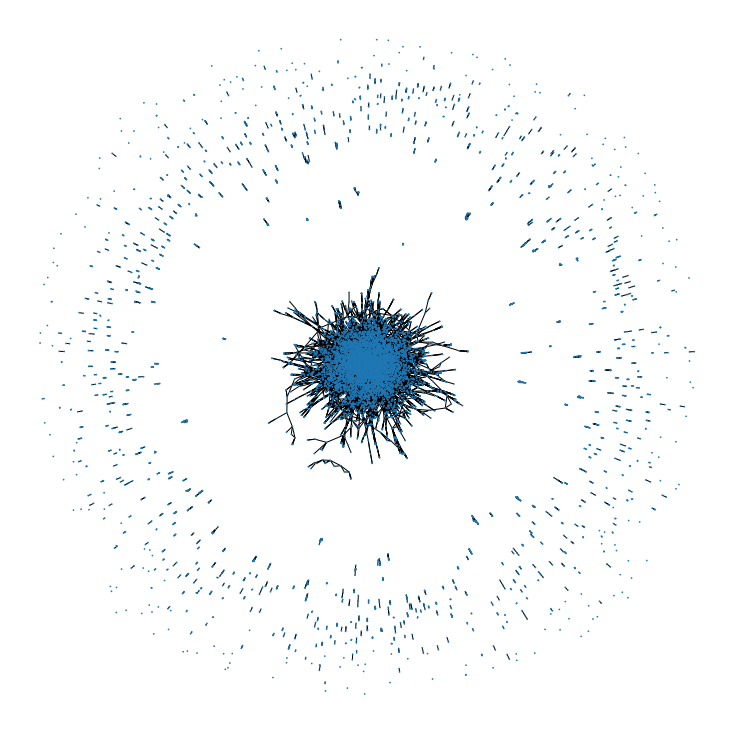

In [18]:
pos = nx.layout.fruchterman_reingold_layout(graph)
plt.figure(figsize=(10, 10))
nx.draw(graph, pos=pos, node_size=[0.5,0.5])

In [19]:
largest_cc = max(nx.connected_components(graph), key=len)
print(f'the largest component contains : {len(largest_cc)} people')

the largest component contains : 8978 people


In [20]:
print("The total number of components is: ", nx.number_connected_components(graph))

The total number of components is:  915


Use centrality to highlight nodes that function as "bridges" between people

In [21]:
centrality = nx.betweenness_centrality(graph.subgraph(largest_cc))

In [22]:
np.quantile(np.array(list(centrality.values())), 0.9)

0.0011535547350951083

In [23]:
lables = nodes.name.to_dict()

lables = { key: lables[key] for (key, value) in centrality.items() if value > 0.03}

In [24]:
node_size = np.array(list(centrality.values()))*10000

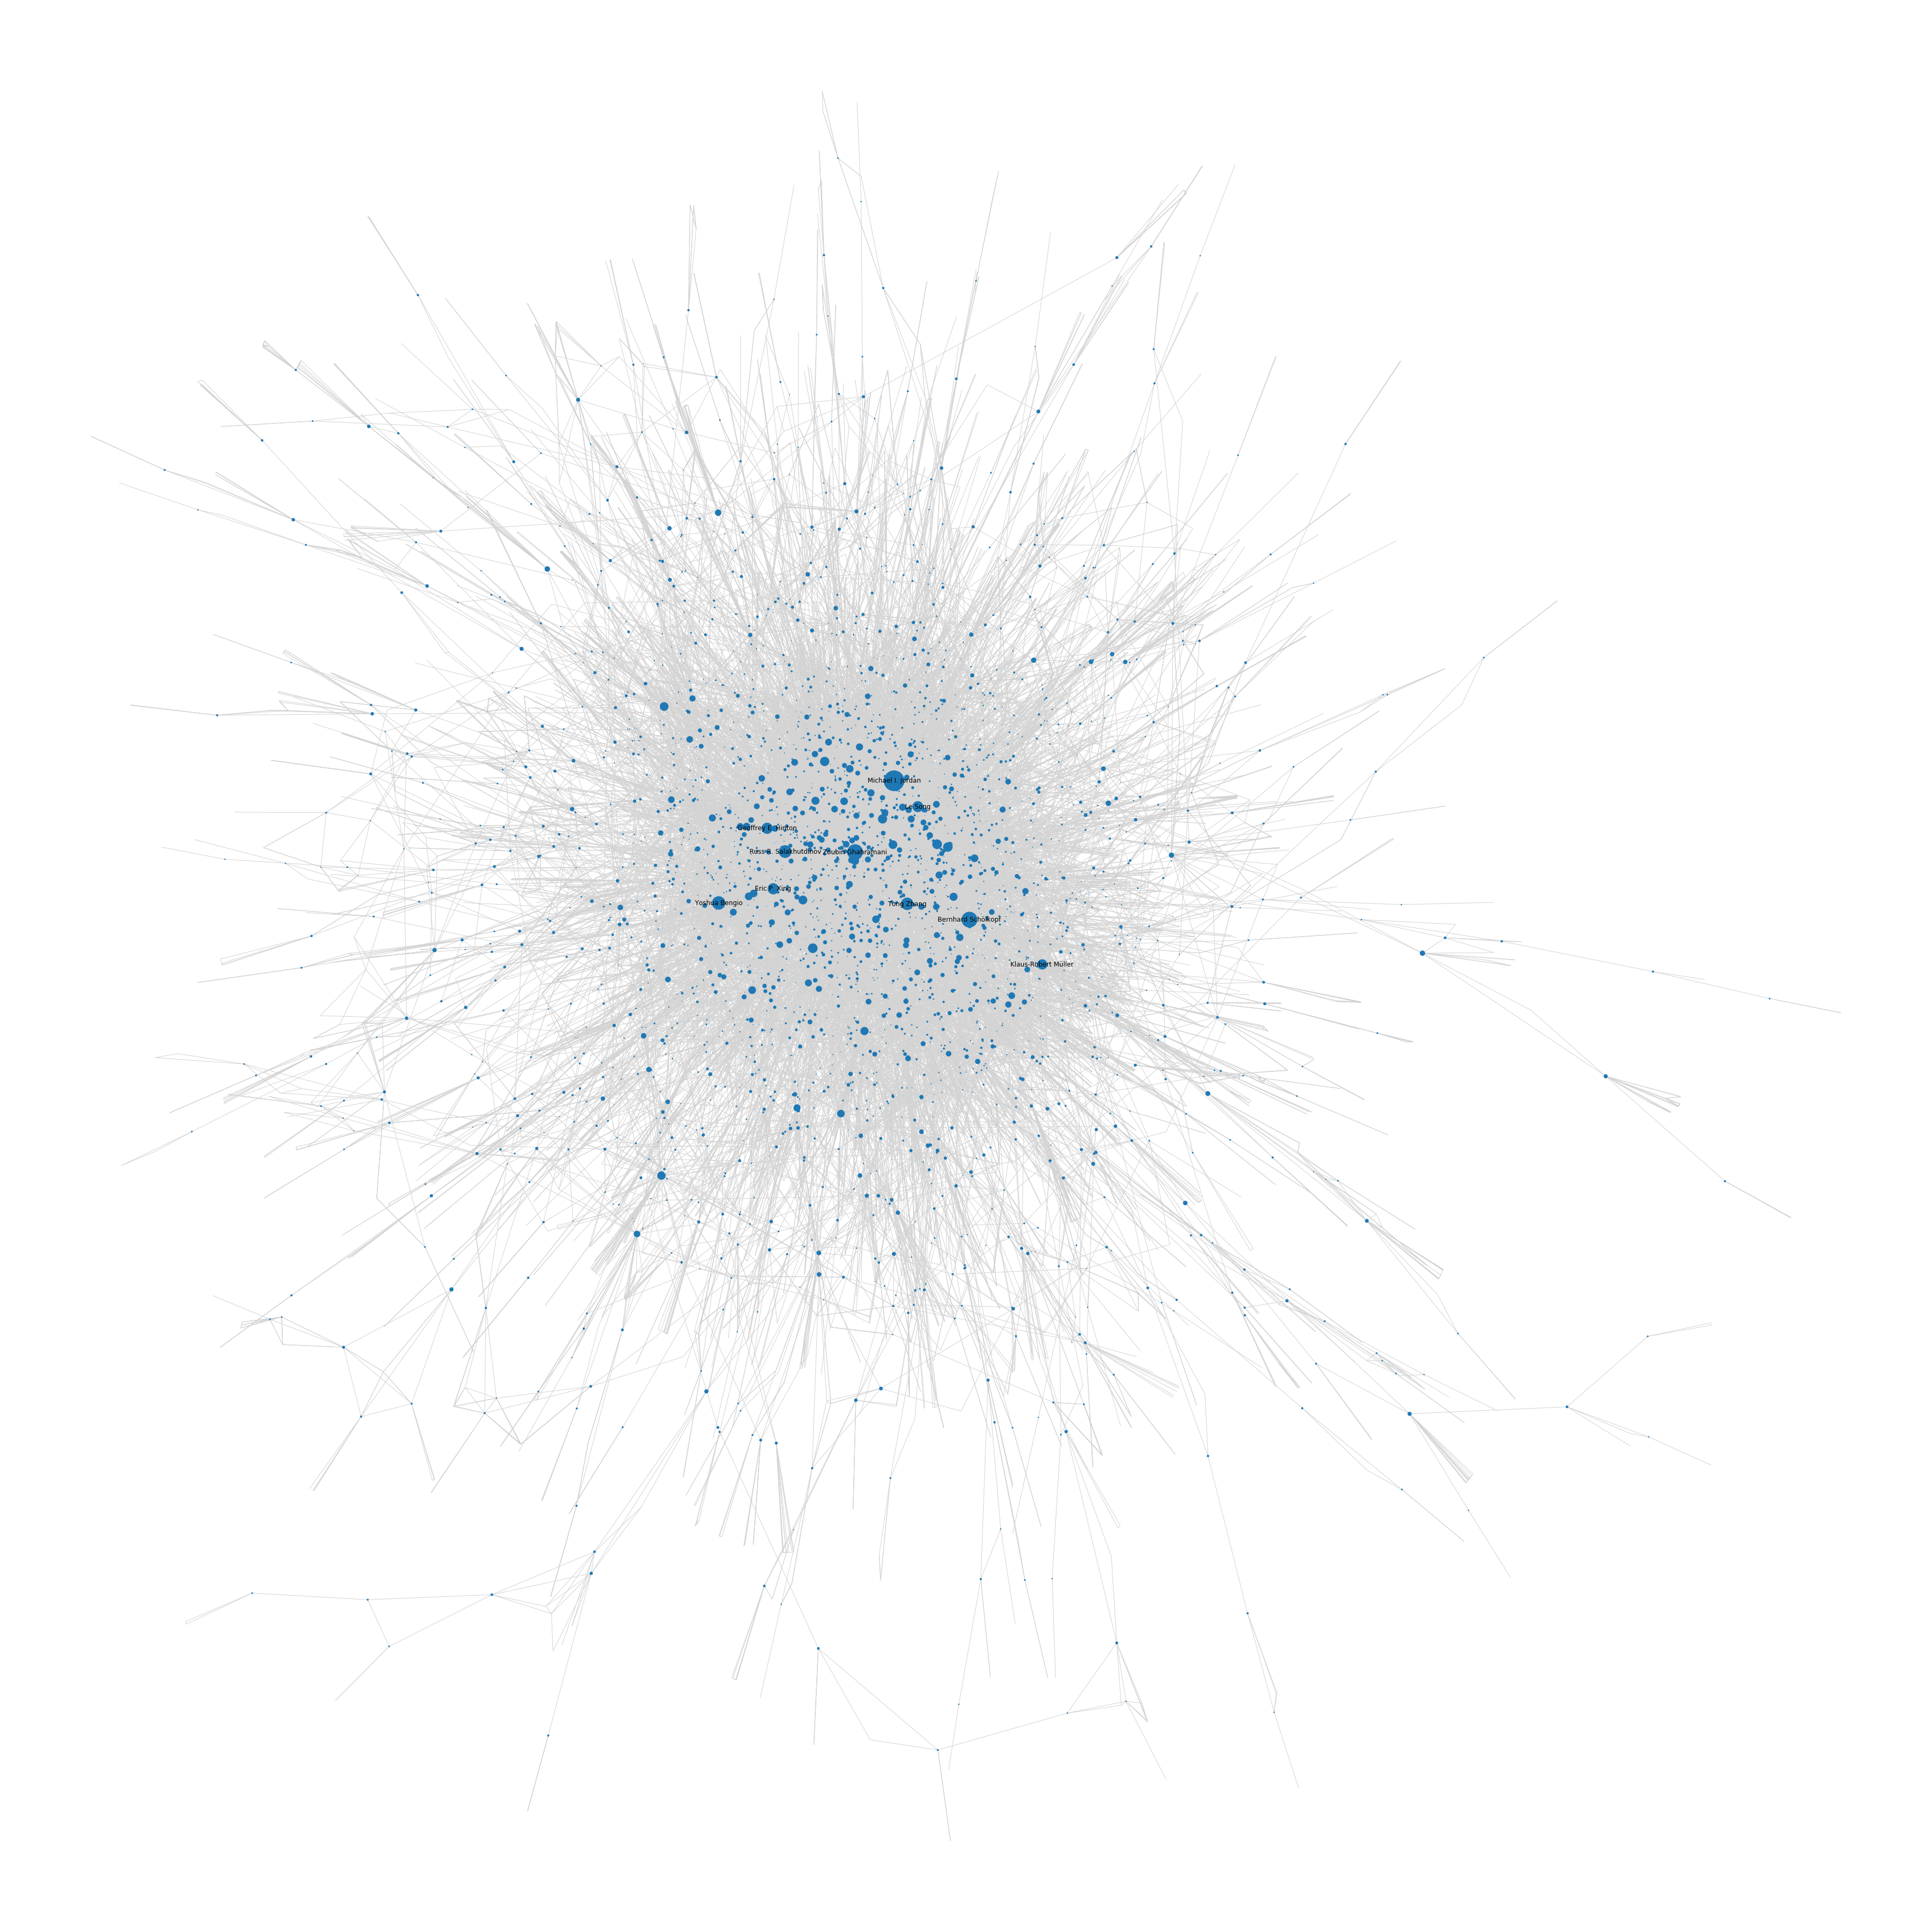

In [25]:
plt.figure(figsize=(50, 50))
nx.draw(graph.subgraph(largest_cc), node_size=node_size, edge_color='lightgray', labels=lables)

In [26]:
nx.average_shortest_path_length(graph.subgraph(largest_cc))

5.951291924390921

In [27]:
nx.average_clustering(graph.subgraph(largest_cc))

0.7009289800022787

In [28]:
nx.density(graph.subgraph(largest_cc))

0.0006096121538091715

**Same graph for people who collaborated at least on 3 papers:**

e.g. we look at frequent collaborators (also forming a main component)

In [30]:
G = nx.Graph(((source, target, attr) for source, target, attr in graph.edges(data=True) if attr['weight'] > 1))
nx.set_node_attributes(G, nodes.name.to_dict(), name='author')
pd.Series([len(i) for i in list(nx.connected_components(G))]).value_counts().sort_index()

2       208
3        86
4        43
5        19
6        12
7         5
8         7
9         4
10        3
11        2
13        3
14        1
16        1
17        1
19        1
26        1
32        1
43        1
1321      1
dtype: int64

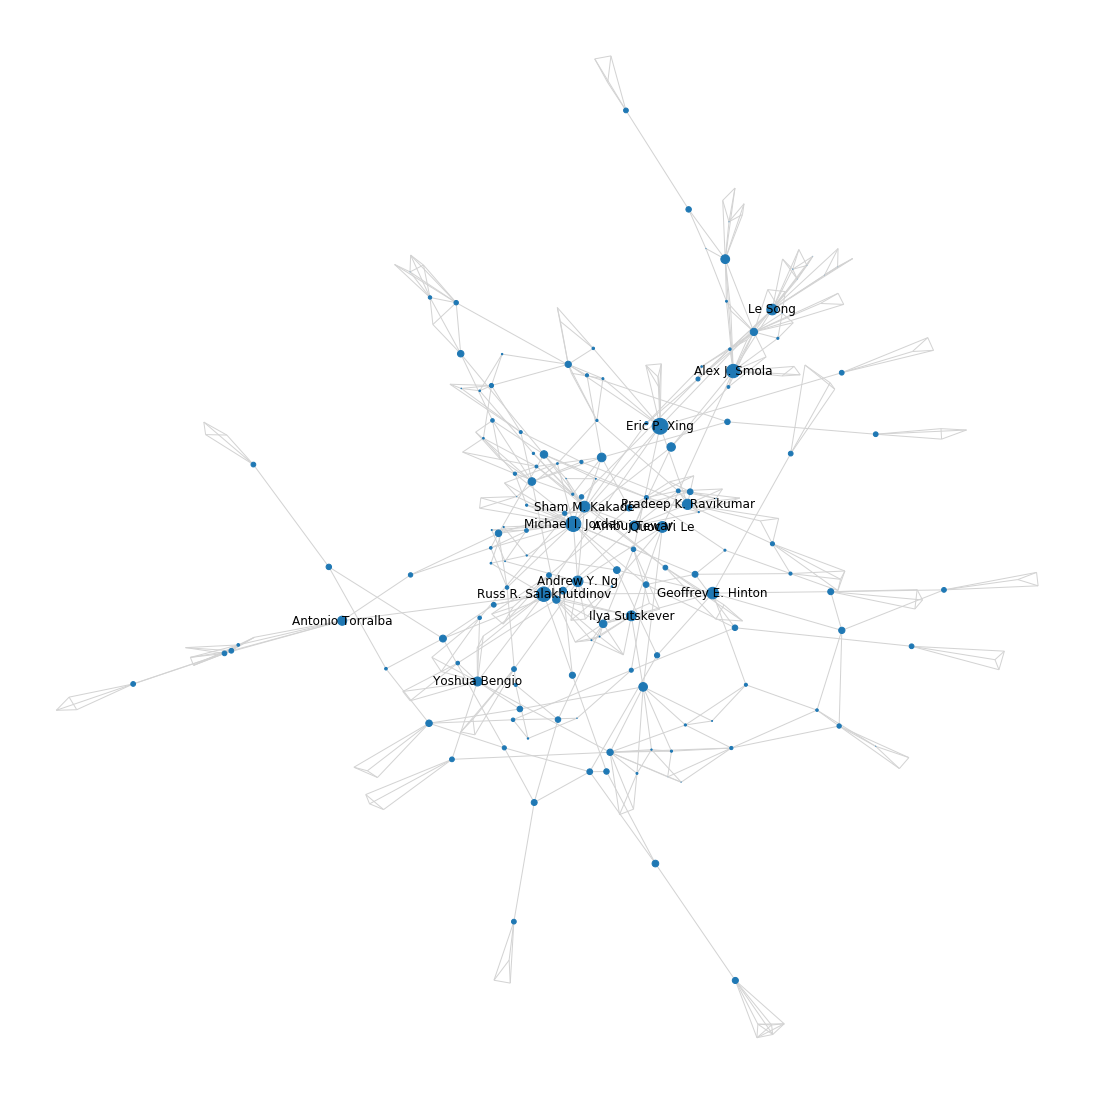

In [31]:
lc = max(nx.connected_components(G), key=len)
core = nx.k_core(G.subgraph(lc), k=3)
core = core.subgraph(max(nx.connected_components(core), key=len))
node_size = pd.Series(nx.betweenness_centrality(core))
labels = nx.get_node_attributes(core.subgraph(node_size[node_size.quantile(0.95) < node_size].index), 'author')
plt.figure(figsize=(15, 15))
pos= nx.layout.spring_layout(core)
nx.draw(core,pos=pos, edge_color='lightgray', node_size=node_size*1000, span=0.01, labels=labels, seed=2)
plt.savefig('figure/author_collab_large.pdf')

In [ ]:
for x

# Coauthorship network (1st method)

In [ ]:


# df_all = df_all[df_all['year']>2015]
# df = df_all[['paper_id', 'author_id', 'name']]
# df.head(10)

## Create graph

In [ ]:
# Initialize graph
G = nx.Graph()

# Transform
# REMARK: The algorithm seems more stable by doing '*=2' than '+=1'
# REMARK: I use 'name' instead of 'author_id' for label purposes.
for p, a in df.groupby('paper_id')['name']: 
    for u, v in itertools.combinations(a, 2):
        if G.has_edge(u, v):
            G[u][v]['weight'] *= 2
        else:
            G.add_edge(u, v, weight=1)
            
# Print graph size
print('\nSize of graph, i.e. number of edges:', G.size())

## Compute best partition

In [ ]:
# Get best partition
partition = community.best_partition(G)
print('Modularity: ', community.modularity(partition, G))

In [ ]:
plt.figure(figsize=(13, 9))
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

## Filter communities
Let's have a look at the largest communities detected. The ones with more than 120 members.

In [ ]:
# Keep only communities with a minimum of authors
centers = {}
communities = {}
G_main_com = G.copy()
min_nb = 120
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    if len(list_nodes) < min_nb:
        G_main_com.remove_nodes_from(list_nodes)
    else:
        # Get center
        H = G_main_com.subgraph(list_nodes)
        d_c = nx.degree_centrality(H)
        center = max(d_c, key=d_c.get)
        centers[center] = com
        communities[com] = center
        # Print community
        print('Community of ', center , '(ID ', com, ') - ', len(list_nodes), ' authors:')
        print(list_nodes, '\n')

In [ ]:
# Display graph
plt.figure(figsize=(13, 9))
node_size = 30
count = 0
pos = nx.spring_layout(G_main_com)
colors = dict(zip(communities.keys(), sns.color_palette('hls', len(communities.keys()))))

for com in communities.keys():
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com and nodes not in communities.values()]
    nx.draw_networkx_nodes(G_main_com, pos, list_nodes, node_size = node_size, node_color = colors[com])
    nx.draw_networkx_nodes(G_main_com, pos, list([communities[com]]), node_size = node_size*5, node_color = colors[com])
nx.draw_networkx_edges(G_main_com, pos, alpha=0.5)
labels = {k: str(v) + ': ' + k for k,v in centers.items()}
nx.draw_networkx_labels(G_main_com, pos, labels)
plt.axis('off')
plt.show()

In [ ]:
# Display induced graph
nodes_main_com = {k: v for k, v in partition.items() if v in communities}
ind = community.induced_graph(nodes_main_com, G_main_com)
print('Number of communities', len(ind.nodes()))
print('\nMain communities and their center node:', communities)

In [ ]:
# Display induced graph
pos_ind = nx.spring_layout(ind)
labels = {k: str(k) + ': ' + v for k,v in communities.items()}
nx.draw(ind, pos_ind, node_list=list(colors.keys()), node_color=list(colors.values()), labels=labels)
plt.show()

In [ ]:
1

In [ ]:
2